In [88]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential


In [49]:
fb_stocks = pd.read_csv('../inputData/fb.us.txt')

In [50]:
fb_stocks

,Date,Open,High,Low,Close,Volume,OpenInt
0,2012-05-18,42.05,45.000,38.000,38.23,580438450,0
1,2012-05-21,36.53,36.660,33.000,34.03,169418988,0
2,2012-05-22,32.61,33.590,30.940,31.00,101876406,0
3,2012-05-23,31.37,32.500,31.360,32.00,73678512,0
4,2012-05-24,32.95,33.210,31.770,33.03,42560731,0
...,...,...,...,...,...,...,...
1376,2017-11-06,178.56,180.450,178.310,180.17,13275578,0
1377,2017-11-07,180.50,180.748,179.403,180.25,12903836,0
1378,2017-11-08,179.79,180.350,179.110,179.56,10467606,0
1379,2017-11-09,178.31,179.400,177.090,179.30,12602188,0


In [51]:
print(fb_stocks.dtypes)
display(fb_stocks.describe())
display(fb_stocks.isnull().sum())

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object


,Open,High,Low,Close,Volume,OpenInt
count,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03,1381.0
mean,83.543667,84.384940,82.630555,83.543827,3.770716e+07,0.0
std,43.981535,44.161698,43.756570,44.015093,3.294912e+07,0.0
min,18.080000,18.270000,17.550000,17.730000,5.913000e+06,0.0
25%,46.750000,47.530000,45.960000,46.700000,1.843043e+07,0.0
50%,78.600000,79.690000,77.930000,78.790000,2.812660e+07,0.0
75%,117.710000,118.600000,116.700000,117.650000,4.601640e+07,0.0
max,182.360000,182.900000,180.570000,182.660000,5.804384e+08,0.0


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [52]:
# We set the date is the index, so that we can plot the different values in our dataset
fb_stocks.Date = pd.to_datetime(fb_stocks.Date)
#fb_stocks.set_index('Date', inplace=True)

In [53]:
# Remove the OpenInt column, since it does not vary at all.
fb_stocks.drop(columns='OpenInt', inplace=True)

In [64]:
cols = fb_stocks.columns
cols

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

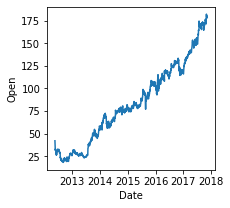

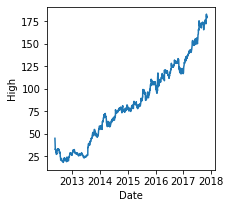

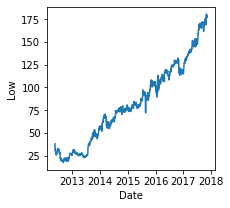

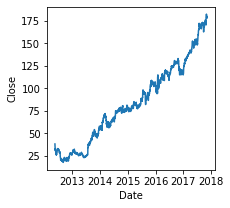

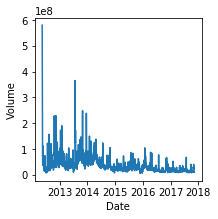

In [75]:

# for col in cols:
#     plt.subplot

for col in cols[1:]:
    plt.figure(figsize=(3,3))
    sns.lineplot(x='Date', y=col, data=fb_stocks)


In [83]:
Xcol = fb_stocks.columns[1:]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(fb_stocks[Xcol])
dataSc = pd.DataFrame(data=scaled, columns=Xcol)

In [84]:
# load data
inputs = dataSc['Open']
outputs = dataSc['Open']
# define generator
generator = TimeseriesGenerator(inputs, outputs, length=25, batch_size=32)
# iterator generator
#for i in range(len(generator)):


In [87]:
print(len(generator))

43


In [ ]:
model = Se

In [ ]:
for i in range

In [22]:

# We do not need the date-column for now, since the data is sequential
fb_stocks.drop(columns='Date', inplace=True)

In [12]:
# load data
inputs = fb_stocks['Open']
outputs = fb_stocks['Open']
# define generator
generator = TimeseriesGenerator(inputs, outputs, ...)
# iterator generator
for i in range(len(generator)):
	...

In [ ]:
TimeseriesGenerator()

In [33]:
history_points = 50
data = fb_stocks
data_normaliser = MinMaxScaler()
data_normalised = data_normaliser.fit_transform(data)

In [34]:
# using the last {history_points} open high low close volume data points, predict the next open value
ohlcv_histories_normalised =      np.array([data_normalised[i  : i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.array([data_normalised[:,0][i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.expand_dims(next_day_open_values_normalised, -1)

next_day_open_values = np.array([data[:,0][i + history_points].copy() for i in range(len(data) - history_points)])
next_day_open_values = np.expand_dims(next_day_open_values_normalised, -1)

y_normaliser = MinMaxScaler()
y_normaliser.fit(np.expand_dims( next_day_open_values ))

TypeError: '(slice(None, None, None), 0)' is an invalid key